## Домашняя работа «Оценка точности модели, переобучение, регуляризация»

In [ ]:
import pandas as pd
import numpy as np
from numpy.typing import ArrayLike
from typing import T

Загрузим исходные данные

In [ ]:
data = pd.read_csv("athletes.csv")

In [ ]:
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


Посмотрим статистику по пропускам

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Удалим данные, имеющие неопределенные значения

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


Удалим данные, не представляющие интереса для дальнейшего исследования

In [ ]:
data.drop(['id', 'name'], axis=1, inplace=True)

Год в дате рождения кажется значимой величиной. Заменим в колонке `dob` дату на значение года 

In [ ]:
data['dob'] = data['dob'].str.replace(r'.*(\d{2}$)', r'\1', regex=True).astype('int')

In [ ]:
data.head()

,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,ESP,male,69,1.72,64.0,athletics,0,0,0
1,KOR,female,86,1.68,56.0,fencing,0,0,0
2,CAN,male,92,1.98,79.0,athletics,0,0,1
3,MDA,male,91,1.83,80.0,taekwondo,0,0,0
4,NZL,male,90,1.81,71.0,cycling,0,0,0


Заменим катеогриальные колонки методом one-hot encoder

In [ ]:
columns = ["nationality", "sex", "sport"]
data = pd.get_dummies(data, columns=columns)

In [ ]:
data.head()


,dob,height,weight,gold,silver,bronze,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,69,1.72,64.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,86,1.68,56.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92,1.98,79.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,91,1.83,80.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,90,1.81,71.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


В качестве целевой переменной для классификации веберем пол. Удалим эти колонки из массива признаков 

In [ ]:
X = data.drop(['sex_male', 'sex_female'], axis=1)

Определим массив классов (откинув дублирующую колонку)

In [ ]:
y = data['sex_male']

In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: sex_male, dtype: uint8

Разделим данные на обучающую и проверучную выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Воспользуемся пайплайном StandardScaler + LogisticRegression для получения метрик качества с помощью библиотечных функций

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
model.score(X_train, y_train)

0.8427354363343311

In [ ]:
model.score(X_test, y_test )

0.8406998158379374

Построим кривую ROC

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
fpr, tpr, thres = roc_curve(y_test, predictions[:,1])

In [ ]:
from matplotlib import pyplot as plt

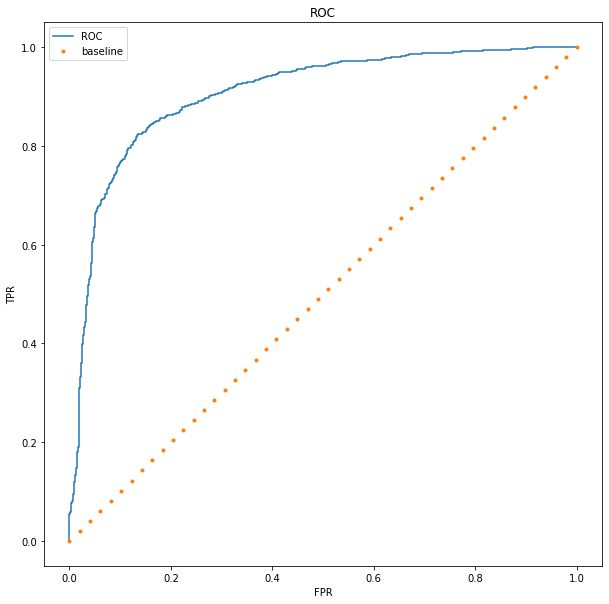

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, tpr, label='ROC')
plt.plot(np.linspace(0,1,50), np.linspace(0,1,50), '.', label='baseline')
plt.title("ROC")
plt.legend()


Получим метрику ROC_AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.9053042965125798

Напишем собственную реализацию кривой ROC

In [ ]:
def custom_roc_curve(y_true: ArrayLike , y_prob: ArrayLike, thresholds: ArrayLike) -> T:
    
    fpr = []
    tpr = []
    precision = []
    for threshold in thresholds:
        y_pred = np.where(y_prob >= threshold, 1, 0)
        #Матрица ошибок
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fpr.append(fp/(fp + tn))
        tpr.append(tp/(tp + fn))
        precision.append(tp/(tp + fp))
        # recall == tpr
    return (np.asarray(fpr), np.asarray(tpr), np.asarray(precision))

Зададим шаг для кривой достаточно большим, это впоследствие даст более четкую кривую PR и более точное значение AUC

In [ ]:
thresholds = np.linspace(0,1,5000)

In [ ]:
fpr_custom, tpr_custom, precision = custom_roc_curve(y_test, predictions[:,1], thresholds)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Построим и сравним библиотечную ROC с нашей реализацией

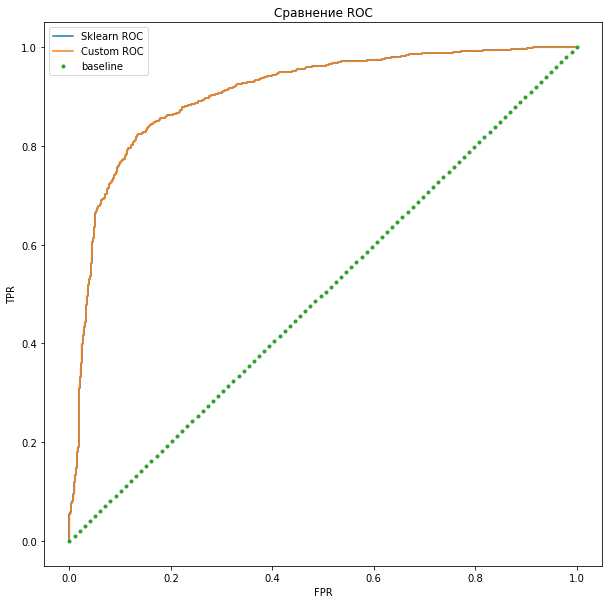

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, tpr, label='Sklearn ROC')
plt.plot(fpr_custom, tpr_custom, label='Custom ROC')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), '.', label='baseline')
plt.title('Сравнение ROC')
plt.legend()

Видно, что кривые идентичны

Построим кривую Precision-Recall по данным нашей реализации ROC

Text(0.5, 1.0, 'PR curve')

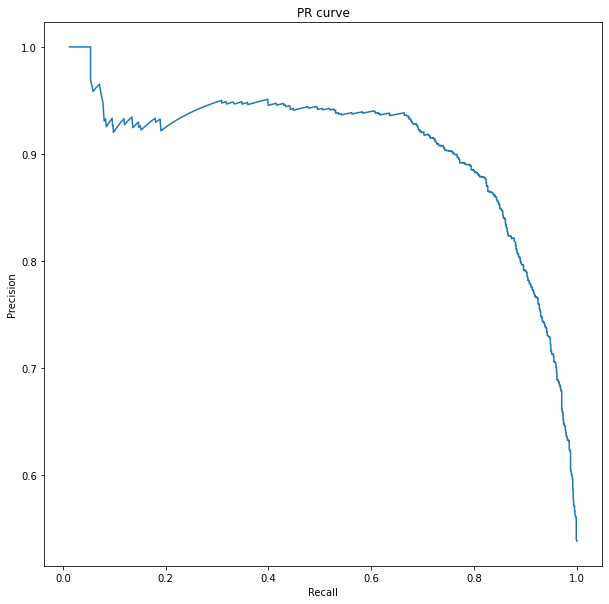

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(tpr_custom, precision)
plt.title("PR curve")

Вычислим ROC-AUC для нашей кривой.
Для этого посчитаем интеграл, как сумму площадей элементарных прямоугольников шириной в единичный шаг thresholds и высотой в значение на кривой в данной точке

In [ ]:
partitions = len(thresholds) - 1
roc_auc = 0
for p in range(partitions):
    roc_auc = roc_auc + (fpr_custom[p] - fpr_custom[p+1])*tpr_custom[p]
roc_auc

0.905352903454674

Как видим, значения библиотечной функции и нашей реализации практически совпадают.

## Выводы

а. Учитывая сильную выпуклость кривой ROC можно сделать вывод, что модель справляется с классифкацией достаточно хорошо, это подтверждает и AUC=0.9. Если анализировать кривую Precision-Recall, то можно сделать вывод о неплохих показателях. Precision держится на высоком уровне (~0.95) вплоть до Recall ~= 0.7

б. ROC может проходить ниже диагонали. Диагональная линия показывает ROC классификатора, выдающего случайный класс. Легко представить классификатор, который выдает класс, обратный целевому. Это можно продемонстрировать, если для вычисления кривой взять обратные показатели из predict_proba. В таком случае мы получим инвертированную кривую:

In [ ]:
fpr, tpr, thres = roc_curve(y_test, predictions[:,0])

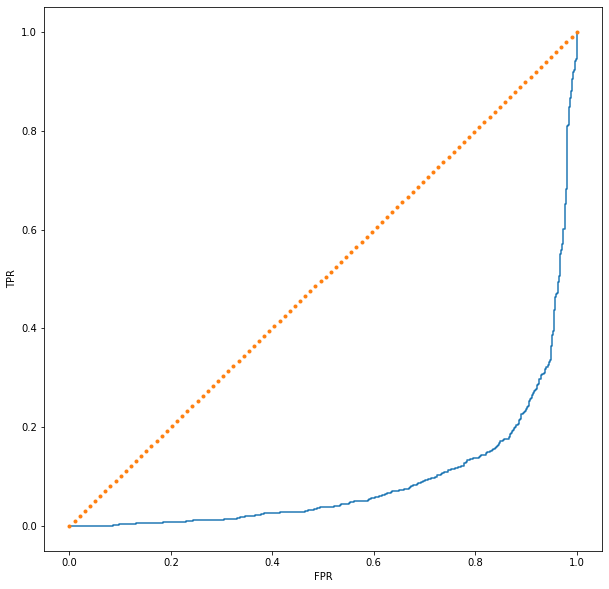

In [ ]:
plt.figure(figsize=(10, 10))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), '.')